## Predicting Liver Disese

Dataset from: https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset?resource=download

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Liver_disease_data.csv')
print('Number of NAs per column:')
print(df.isna().sum())
print('')
print('Data types of columns:')
print(df.dtypes)

Number of NAs per column:
Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

Data types of columns:
Age                     int64
Gender                  int64
BMI                   float64
AlcoholConsumption    float64
Smoking                 int64
GeneticRisk             int64
PhysicalActivity      float64
Diabetes                int64
Hypertension            int64
LiverFunctionTest     float64
Diagnosis               int64
dtype: object


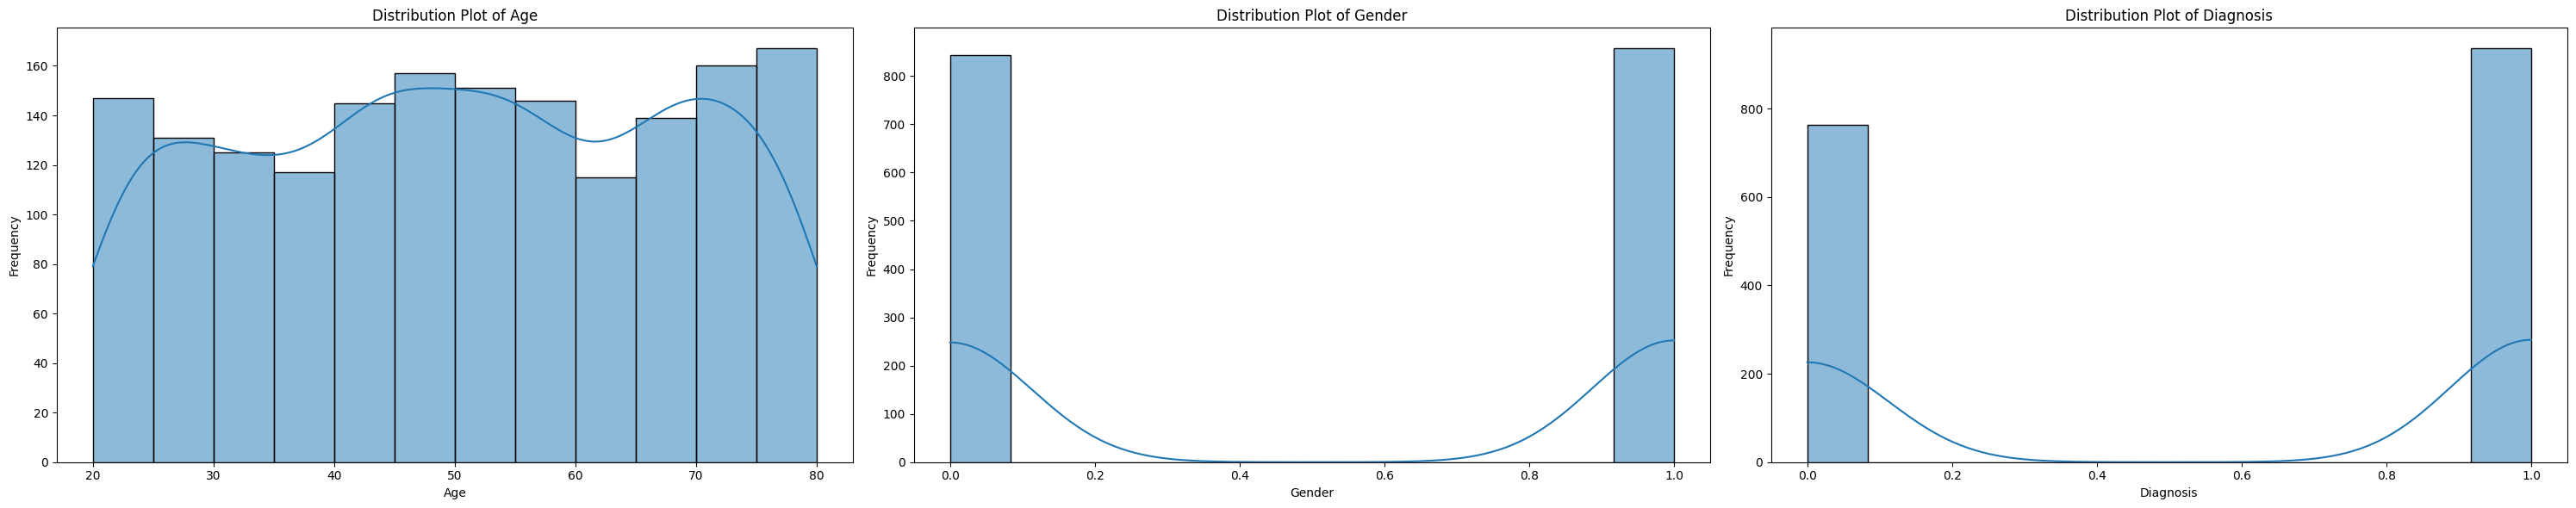

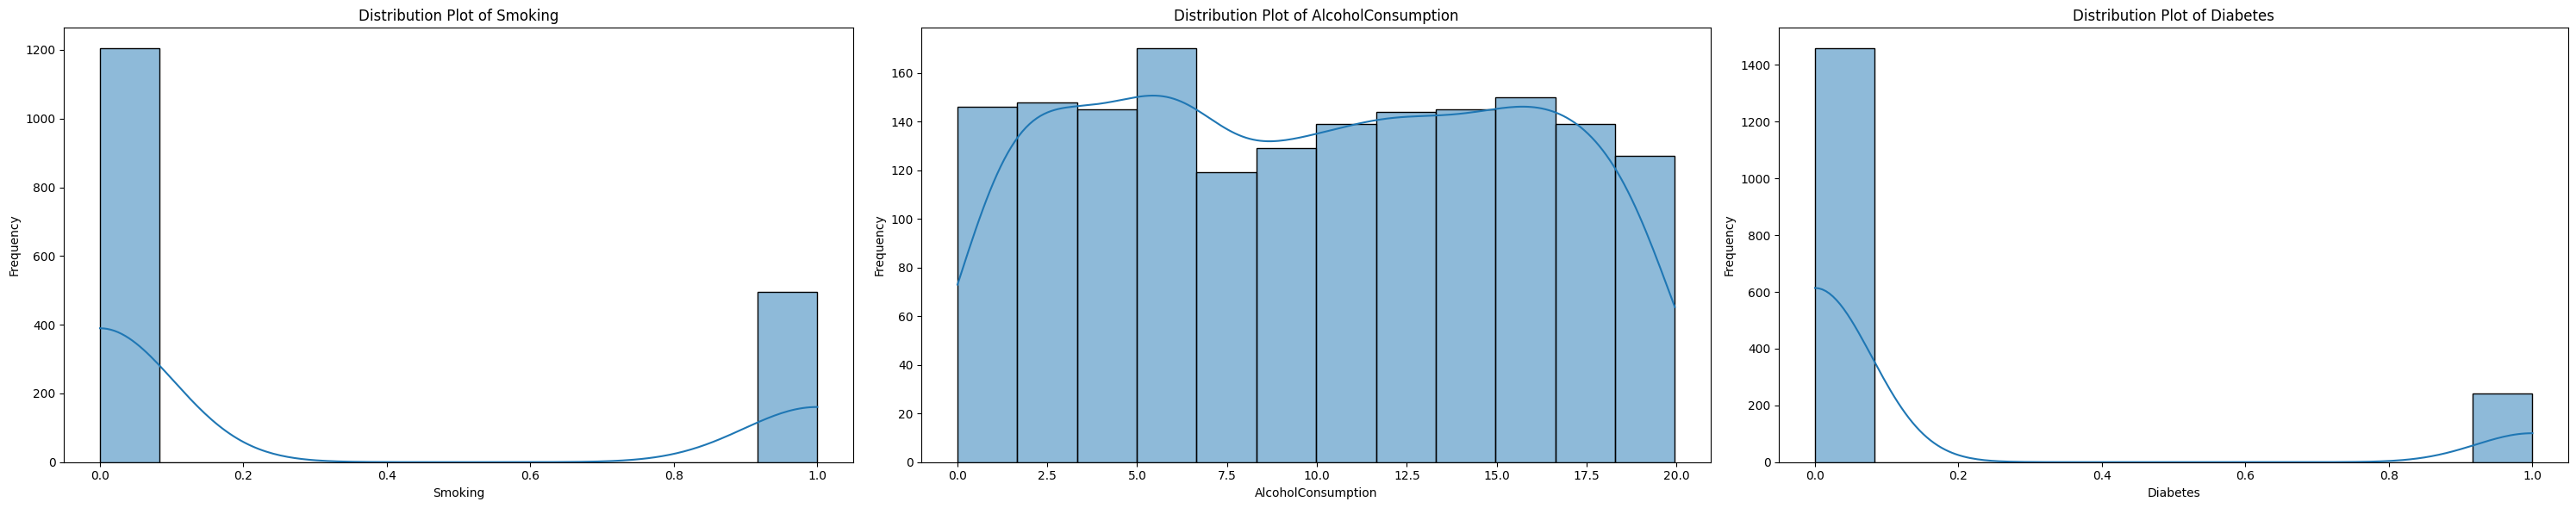

In [16]:
# Function to plot distribution graphs side by side
def plot_distribution(df, columns):
    num_subplots = len(columns)
    fig, axes = plt.subplots(1, num_subplots, figsize=(10 * num_subplots, 6))
    
    for i, column_name in enumerate(columns):
        sns.histplot(df[column_name], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution Plot of {column_name}')
        axes[i].set_xlabel(column_name)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_distribution(df, ['Age', 'Gender', 'Diagnosis'])
plot_distribution(df, ['Smoking', 'AlcoholConsumption', 'Diabetes'])

### Making a simple linear regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


columns_except_diagnosis = [col for col in df.columns if col != 'Diagnosis']
# Define the features (X) and the target (y)
X = df[columns_except_diagnosis]
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model using scikit-learn
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Fit the logistic regression model using statsmodels to get p-values
X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print out the summary which includes p-values
print("\nSummary from statsmodels logistic regression model:")
print(result.summary())

# Extract and print p-values for each feature
print("\nP-values for each feature:")
print(result.pvalues)

Accuracy: 0.8147058823529412
Confusion Matrix:
[[126  36]
 [ 27 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       162
           1       0.81      0.85      0.83       178

    accuracy                           0.81       340
   macro avg       0.82      0.81      0.81       340
weighted avg       0.82      0.81      0.81       340

Optimization terminated successfully.
         Current function value: 0.395154
         Iterations 7

Summary from statsmodels logistic regression model:
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1360
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                           10
Date:                Sun, 16 Jun 2024   Pseudo R-squ.:                  0.4244
Time:                        0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Practical Interpretation of Logistic Regression Results

This logistic regression model aims to predict the likelihood of liver disease diagnosis based on various predictor variables.

### Intercept (const)
- **Coefficient**: -10.3607
- **Interpretation**: The baseline log-odds of liver disease when all predictors are zero is very low.

### Age
- **Coefficient**: 0.0309
- **Odds Ratio**: Approximately 1.031
- **Interpretation**: Each additional year of age increases the odds of being diagnosed with liver disease by approximately 3.1%. Given the age range of 20 to 80 years, older individuals have a higher risk.

### Gender
- **Coefficient**: 1.2675
- **Odds Ratio**: Approximately 3.55
- **Interpretation**: Males (coded as 0) have about 3.55 times higher odds of being diagnosed with liver disease compared to females (coded as 1).

### BMI
- **Coefficient**: 0.0846
- **Odds Ratio**: Approximately 1.088
- **Interpretation**: Each unit increase in BMI raises the odds of liver disease by approximately 8.8%. With a BMI range of 15 to 40, higher BMI values are associated with higher risk.

### Alcohol Consumption
- **Coefficient**: 0.2428
- **Odds Ratio**: Approximately 1.275
- **Interpretation**: Each unit increase in alcohol consumption (units per week) increases the odds of liver disease by approximately 27.5%. The range is 0 to 20 units per week, indicating that higher alcohol consumption significantly raises the risk.

### Smoking
- **Coefficient**: 1.7818
- **Odds Ratio**: Approximately 5.94
- **Interpretation**: Smokers (coded as 1) have about 5.94 times higher odds of being diagnosed with liver disease compared to non-smokers (coded as 0).

### Genetic Risk
- **Coefficient**: 0.6571
- **Odds Ratio**: Approximately 1.93
- **Interpretation**: Each unit increase in genetic risk (Low = 0, Medium = 1, High = 2) increases the odds of liver disease by approximately 93%. Higher genetic risk significantly raises the likelihood of liver disease.

### Physical Activity
- **Coefficient**: -0.1411
- **Odds Ratio**: Approximately 0.868
- **Interpretation**: Each unit increase in physical activity (hours per week) decreases the odds of liver disease by approximately 13.2%. Given the range of 0 to 10 hours per week, more physical activity is associated with a lower risk.

### Diabetes
- **Coefficient**: 1.0045
- **Odds Ratio**: Approximately 2.73
- **Interpretation**: Individuals with diabetes (coded as 1) have about 2.73 times higher odds of being diagnosed with liver disease compared to those without diabetes (coded as 0).

### Hypertension
- **Coefficient**: 1.5495
- **Odds Ratio**: Approximately 4.71
- **Interpretation**: Individuals with hypertension (coded as 1) have about 4.71 times higher odds of being diagnosed with liver disease compared to those without hypertension (coded as 0).

### Liver Function Test
- **Coefficient**: 0.0562
- **Odds Ratio**: Approximately 1.058
- **Interpretation**: Each unit increase in liver function test score increases the odds of liver disease by approximately 5.8%. The range is 20 to 100, indicating that worse liver function test results are associated with a higher likelihood of liver disease.

### Summary
The logistic regression model identifies several significant predictors for liver disease. Older age, being male, higher BMI, alcohol consumption, smoking, genetic risk, diabetes, hypertension, and poor liver function test results are associated with higher odds of liver disease. Conversely, increased physical activity is associated with lower odds of liver disease. These insights can inform prevention and intervention strategies for reducing the risk of liver disease.


In [30]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(n_estimators=250,  bootstrap=True, max_depth=10, min_samples_split=2)
rfm.fit(X_train, y_train)
rf_pred = rfm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9029411764705882
Confusion Matrix:
[[141  21]
 [ 12 166]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       162
           1       0.89      0.93      0.91       178

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340



In [35]:
import shap 

# Create and fit the explainer
explainer = shap.Explainer(rfm.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 341it [03:34,  1.51it/s]                         


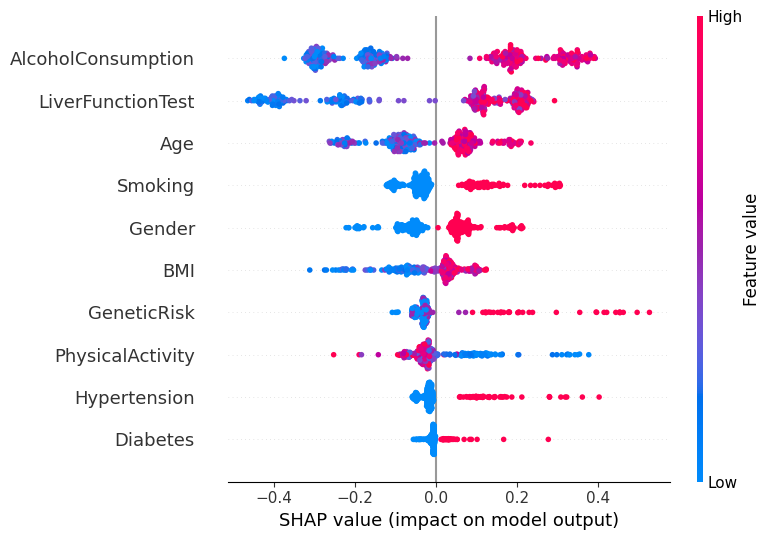

In [36]:
 shap.summary_plot(shap_values, X_test, feature_names=X_test.columns.tolist())

###### This SHAP (SHapley Additive exPlanations) plot illustrates the impact of various features on the prediction of liver disease, where the dependent variable is binary (1 for liver disease and 0 for no disease). The features listed include Alcohol Consumption, Liver Function Test results, Age, Smoking habits, Gender, BMI, Genetic Risk, Physical Activity, Hypertension, and Diabetes. Each point on the plot represents an instance, with the color gradient indicating the feature value (red for high and blue for low). The position of the points along the x-axis shows the SHAP value, which quantifies the feature's impact on the prediction. Positive SHAP values push the prediction towards liver disease (1), while negative values push it towards no disease (0). For instance, high alcohol consumption and poor liver function test results (red points on the right) have a significant positive impact on predicting liver disease, whereas high physical activity (red points on the left) has a negative impact, suggesting it is protective against liver disease.